In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Existing model accuracies
transnn_mha_accuracies = [0.9094, 0.9106, 0.9280, 0.9331, 0.9466, 0.9156]
cnn_transformer_accuracies = [0.8807, 0.8634, 0.8671, 0.8422, 0.8807, 0.8298]
gru_transformer_accuracies = [0.9106, 0.9043, 0.9317, 0.9006, 0.9304, 0.8957]

# New model accuracies
deepconv_transformer_accuracies = [0.7797, 0.7525, 0.8193, 0.7373, 0.8178, 0.8042]
self_attention_accuracies = [0.2000, 0.2000, 0.2000, 0.2012, 0.2012, 0.2000]
spatial_temporal_transformer_accuracies = [0.7975, 0.8186, 0.8422, 0.8037, 0.8211, 0.7938]
transformer_gnn_accuracies = [0.88, 0.8832, 0.9130, 0.8720, 0.9180, 0.8708]
ts_transformer_accuracies = [0.3627, 0.4335, 0.4820, 0.3665, 0.3640, 0.3888]
hierarchical_transformer_accuracies = [0.7752, 0.8062, 0.8273, 0.7839, 0.8012, 0.7801]
lstm_attention_accuracies = [0.5466, 0.5255, 0.5242, 0.5304, 0.5317, 0.5627]
ts_bert_accuracies = [0.2000, 0.2000, 0.2000, 0.2012, 0.2012, 0.2000]

# Calculate means and standard deviations for all models
model_names = [
    'TransNN-MHA', 'CNN-Transformer', 'GRU-Transformer', 'DeepConv + Transformer',
    'Self-Attention', 'Spatial-Temporal Transformer', 'Transformer + GNN',
    'TS-Transformer', 'Hierarchical Transformer', 'LSTM + Attention', 'TS-BERT'
]

model_accuracies = [
    transnn_mha_accuracies, cnn_transformer_accuracies, gru_transformer_accuracies,
    deepconv_transformer_accuracies, self_attention_accuracies, spatial_temporal_transformer_accuracies,
    transformer_gnn_accuracies, ts_transformer_accuracies, hierarchical_transformer_accuracies,
    lstm_attention_accuracies, ts_bert_accuracies
]

# Calculate mean and standard deviation for each model
means = [np.mean(acc) for acc in model_accuracies]
stds = [np.std(acc) for acc in model_accuracies]

# Prepare a summary table
df_summary = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': means,
    'Standard Deviation': stds
})

# Kruskal-Wallis test between all models
kruskal_test = stats.kruskal(*model_accuracies)

# Display the summary of model performance
print("Model Performance Summary:\n", df_summary)

# Return Kruskal-Wallis test results
print("\nKruskal-Wallis Test Result:", kruskal_test)


Model Performance Summary:
                            Model  Mean Accuracy  Standard Deviation
0                    TransNN-MHA       0.923883            0.013371
1                CNN-Transformer       0.860650            0.018909
2                GRU-Transformer       0.912217            0.014043
3         DeepConv + Transformer       0.785133            0.031571
4                 Self-Attention       0.200400            0.000566
5   Spatial-Temporal Transformer       0.812817            0.016557
6              Transformer + GNN       0.889500            0.018931
7                 TS-Transformer       0.399583            0.044310
8       Hierarchical Transformer       0.795650            0.017990
9               LSTM + Attention       0.536850            0.013664
10                       TS-BERT       0.200400            0.000566

Kruskal-Wallis Test Result: KruskalResult(statistic=62.28169622936189, pvalue=1.3376497062280731e-09)


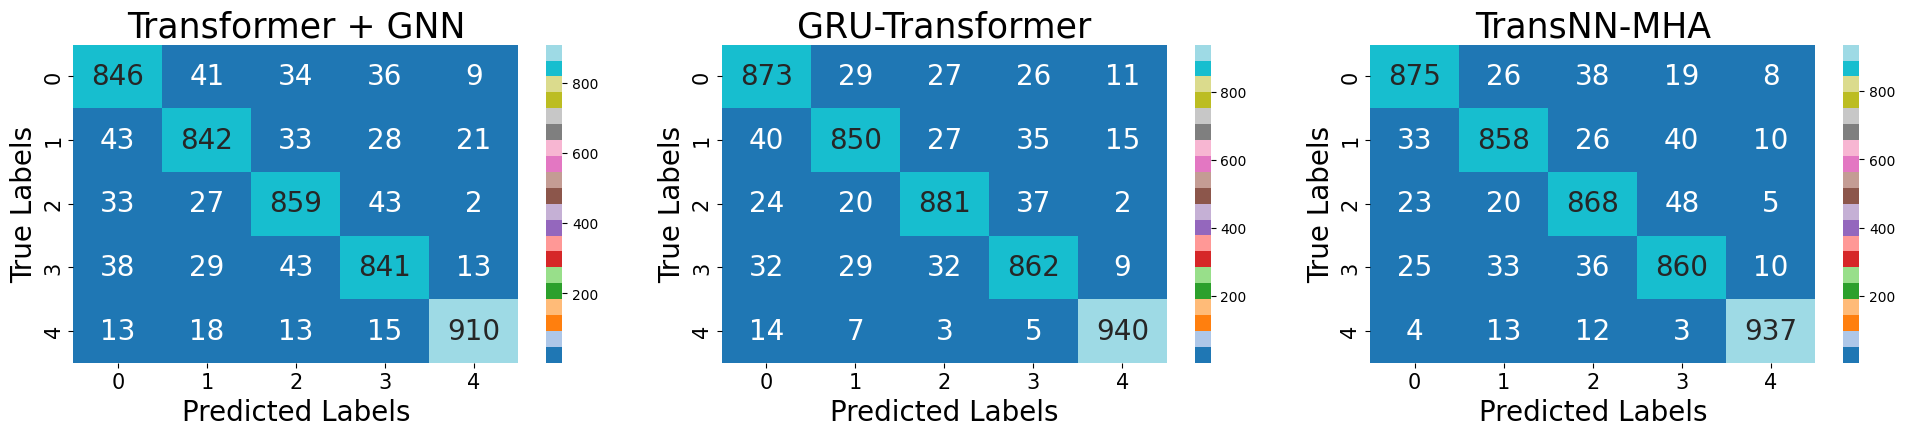

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Confusion matrices for each model
conf_matrix_gnn = np.array([[846, 41, 34, 36, 9],
                            [43, 842, 33, 28, 21],
                            [33, 27, 859, 43, 2],
                            [38, 29, 43, 841, 13],
                            [13, 18, 13, 15, 910]])

conf_matrix_gru = np.array([[873, 29, 27, 26, 11],
                            [40, 850, 27, 35, 15],
                            [24, 20, 881, 37, 2],
                            [32, 29, 32, 862, 9],
                            [14, 7, 3, 5, 940]])

conf_matrix_transnn = np.array([[875, 26, 38, 19, 8],
                                [33, 858, 26, 40, 10],
                                [23, 20, 868, 48, 5],
                                [25, 33, 36, 860, 10],
                                [4, 13, 12, 3, 937]])

# Labels for the classes
class_labels = ['Imaginary Both Feet', 'Imaginary Right Fist', 'Real Both Feet', 'Real Right Fist', 'Rest']

# Function to plot a confusion matrix with custom formatting
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap="tab20", ax=ax, annot_kws={"size": 20})
    ax.set_xlabel("Predicted Labels", fontsize=20)
    ax.set_ylabel("True Labels", fontsize=20)
    ax.set_title(title, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)

# Save and show plots
def save_and_show_plots(confusion_matrices, models, filename):
    with PdfPages(filename) as pdf:
        n_rows = (len(models) + 2) // 3  # Calculate number of rows needed
        fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))  # Adjust figure size
        axes = axes.flatten()  # Flatten the axes array for easy indexing

        for ax in axes[len(models):]:  # Hide any unused axes
            ax.axis('off')

        for ax, model in zip(axes, models):
            plot_confusion_matrix(confusion_matrices[model], f"{model}", ax)

        plt.tight_layout(pad=3.0)
        pdf.savefig(fig)  # Save the figure to PDF
        plt.show()

# Models and their confusion matrices
confusion_matrices = {
    "Transformer + GNN": conf_matrix_gnn,
    "GRU-Transformer": conf_matrix_gru,
    "TransNN-MHA": conf_matrix_transnn
}

# Plot and save the confusion matrices to a PDF
models = ["Transformer + GNN", "GRU-Transformer", "TransNN-MHA"]
save_and_show_plots(confusion_matrices, models, "confusion_matrices.pdf")
